In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [3]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.30091959])

In [4]:
X_poly[0]

array([-1.30091959,  1.69239179])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02082281]), array([[1.12804241, 0.43568679]]))

When there are multiple features, Polynomial Regression is capable of finding relationships between features. This is made possible by the fact that PolynominalFeatures also adds all combination of features up to the given degree

### Learning curves of plain Linear Regression model

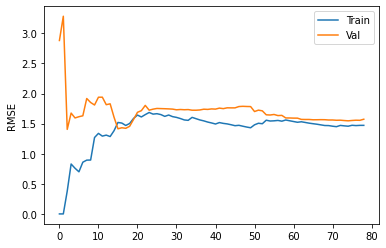

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val =train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors))
    plt.plot(np.sqrt(val_errors))
    plt.ylabel('RMSE')
    plt.legend(['Train','Val'])
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Learning curves of a 10th- degree polynominal model 

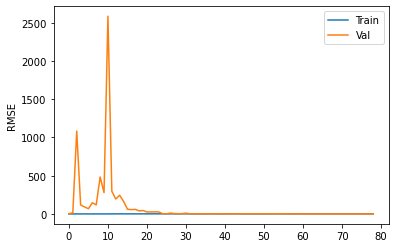

In [8]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)), 
                                 ('lin_reg', LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)
plt.show() 

### The Bias/Variance Tradeoff 
- Bias: wrong assumptions, such as assumption that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data <br>
- Variance: the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, overfit the training data <br>
- Irreducible error: The noisiness of the data itself. (Clean up the data, ex fix data sources, broken sensors, detect and remove outliers) <br>
Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance

## Regularized Linear Models

Reduce overfitting by regularizing the model. For a linear model, regularization is typically achieved by constraining the weights of the model. 3 techniques: Ridge Regression, Lasso Regression and Elastic Net

1. Ridge Regression 

In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver ='cholesky')
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [13]:
ridge_reg.predict([[1.5]])

array([[4.71256229]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.69035115])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector

2. Lasso Regression

Is a nother regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm

An important characteristic of Lasso Regression is that it tend to completely eliminate the weights of the least important features (set them to zero).

In [15]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.66260112])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.69941963])

In [17]:
#Về bản chất thì Ridge hay Lasso đều là thêm 1 regularization term vào cost function nên dùng thẳng Lasso cũng đc, hoặc cho penalty l1 đối với lasso, penalty l2 đối với Ridge

3. Elastic Net <br>
Is a middle ground between Ridge Regression and Lasso Regression

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.66042891])

When should we use plain Linear Regression (without any regularization), Ridge, Lasso or Elastic Net?
Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features'weights down to zero

4. Early Stopping

## Logistic Regression

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [24]:
import warnings

# Filter out warning messages
warnings.filterwarnings("ignore")
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

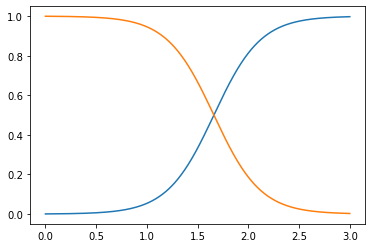

In [27]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], label = 'Iris_Virginica')
plt.plot(X_new, y_proba[:,0], label = "Not Iris-Virginica")


array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])